# How to sound like a data scientist

## The data science Venn diagram

### Parsing a single tweet

In [1]:
tweet = "RT @j_o_n_dnger: $TWTR now top holding for Andor, unseating $AAPL"

In [2]:
words_in_tweet = tweet.split(" ") # list words in tweet spliting by space

In [4]:
for word in words_in_tweet:             # CM:: for each word in list
    if "$" in word:                     # CM:: if word has a "cashtag"
        print("THIS TWEET IS ABOUT", word)  # CM::print the match

('THIS TWEET IS ABOUT', '$TWTR')
('THIS TWEET IS ABOUT', '$AAPL')


In [5]:
words_in_tweet

['RT',
 '@j_o_n_dnger:',
 '$TWTR',
 'now',
 'top',
 'holding',
 'for',
 'Andor,',
 'unseating',
 '$AAPL']

## Data science case studies

### Case study - marketing dollars

In [3]:
import pandas as pd

In [4]:
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
    'Sales': [22.1, 10.4, 9.3, 18.5, 12.9]
}

In [5]:
df = pd.DataFrame(data)

In [6]:
print(df)

   Newspaper  Radio  Sales     TV
0       69.2   37.8   22.1  230.1
1       45.1   39.3   10.4   44.5
2       69.3   45.9    9.3   17.2
3       58.5   41.3   18.5  151.5
4       58.4   10.8   12.9  180.8


In [7]:
import seaborn as sns

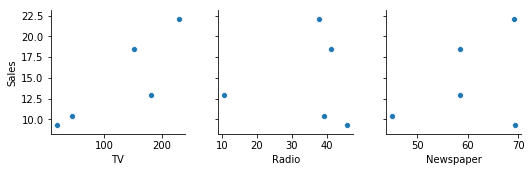

In [8]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

### Case study - what's in a job description?

In [1]:
import requests

In [3]:
from bs4 import BeautifulSoup

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
texts = []

for index in range(0,1000,10):
    page = "https://indeed.com/jobs?q=data+scientist&start=" + str(index)
    
    web_result = requests.get(page).text
    
    soup = BeautifulSoup(web_result)
    
    for listing in soup.findAll("div", {"class": "summary"}):
        texts.append(listing.text)

In [20]:
len(texts)

1000

In [24]:
vect = CountVectorizer(ngram_range=(1, 2), stop_words="english")

matrix = vect.fit_transform(texts)

print(len(vect.get_feature_names()))

freqs = [
    (word, matrix.getcol(idx).sum()) for word, idx in vect.vocabulary_.items()
]

for phrase, times in sorted(freqs, key = lambda x: -x[1])[:25]:
    print(phrase, times)

9808
(u'data', 802)
(u'learning', 514)
(u'machine', 474)
(u'machine learning', 449)
(u'analytics', 308)
(u'experience', 281)
(u'science', 149)
(u'statistical', 138)
(u'python', 129)
(u'business', 127)
(u'techniques', 125)
(u'team', 118)
(u'scientists', 113)
(u'insights', 112)
(u'work', 109)
(u'analysis', 109)
(u'sql', 108)
(u'mining', 107)
(u'statistics', 106)
(u'deep', 102)
(u'advanced', 101)
(u'data scientists', 99)
(u'data mining', 95)
(u'years', 92)
(u'using', 92)
